In [2]:
import numpy as np
import pandas as pd

In [3]:
# Data Input as Data Frame
data = pd.read_csv("/home/prasun/GitDemo/CRO_IIITL_Test/mushroom/agaricus-lepiota.data")
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [4]:
# Primary Exploration
data.shape

(8123, 23)

In [30]:
cols = [
    'class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 
    'stalk-color-below-ring', 'veil-type', 'veil-color', 
    'ring-number', 'ring-type', 'spore-print-color', 'population', 
    'habitat'
]
cols

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [32]:
data.columns = cols
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [43]:
# Setting aside the target column
y = data["class"]


In [44]:
#Treating the labels
y1 = y.apply(lambda x: 1 if x=="e" else 0).values #Labelled poisonous as 0, edible as 1
np.unique(y1)

array([0, 1])

In [46]:
# Setting aside the feature columns
X = data.drop(["class"],axis= "columns")
X.shape

(8123, 22)

In [56]:
# Treating Missing Values on Attribute 11 (stalk-root)
X.loc[X["stalk-root"] == "?"]
X["stalk-root"].value_counts()

stalk-root
b    3776
?    2480
e    1119
c     556
r     192
Name: count, dtype: int64

In [8]:
# Including Label Encoder
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder()
X1 = hot.fit_transform(X).toarray()

In [9]:
# Splitting Train-Test Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2)

In [10]:
# Primary Model Training
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

LogisticRegression()

<Axes: >

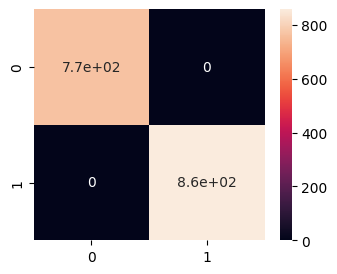

In [11]:
# Visualizing Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix

y_pred = lreg.predict(X_test)
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize= (4,3))
sns.heatmap(data=cm, annot= True,square=True)



In [12]:
lreg.score(X_test,y_test)

1.0

In [13]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
sc = cross_val_score(lreg, X_test,y_test,cv = 10)
print(f"Score: {np.mean(sc)}")

Score: 1.0
